In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
data = pd.read_csv("MatchTimelinesFirst15.csv")
data.head()

,Unnamed: 0,matchId,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,3.493251e+09,0.0,24575.0,349.0,89.0,8.6,25856.0,346.0,80.0,9.2,6.0,1.0,0.0,1.0,12.0,2.0,0.0,1.0
1,1,3.464936e+09,0.0,27210.0,290.0,36.0,9.0,28765.0,294.0,92.0,9.4,20.0,0.0,0.0,0.0,19.0,2.0,0.0,0.0
2,2,3.428426e+09,1.0,32048.0,346.0,92.0,9.4,25305.0,293.0,84.0,9.4,17.0,3.0,0.0,0.0,11.0,0.0,0.0,4.0
3,3,3.428347e+09,0.0,20261.0,223.0,60.0,8.2,30429.0,356.0,107.0,9.4,7.0,0.0,0.0,3.0,16.0,3.0,0.0,0.0
4,4,3.428351e+09,1.0,30217.0,376.0,110.0,9.8,23889.0,334.0,60.0,8.8,16.0,3.0,0.0,0.0,8.0,0.0,0.0,2.0


In [ ]:
X = data.iloc[:5000,3:19]
y = data.iloc[:5000,2]

In [ ]:
print(X)
print(y)

      blueGold  blueMinionsKilled  blueJungleMinionsKilled  blueAvgLevel  \
0      24575.0              349.0                     89.0           8.6   
1      27210.0              290.0                     36.0           9.0   
2      32048.0              346.0                     92.0           9.4   
3      20261.0              223.0                     60.0           8.2   
4      30217.0              376.0                    110.0           9.8   
...        ...                ...                      ...           ...   
4995   27820.0              364.0                     95.0           9.8   
4996   26420.0              342.0                    106.0           9.4   
4997   25215.0              374.0                     66.0           9.0   
4998   28682.0              355.0                     91.0           9.6   
4999   27072.0              295.0                     81.0           9.0   

      redGold  redMinionsKilled  redJungleMinionsKilled  redAvgLevel  \
0     25856.0  

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
# menggabungkan 2 dataframe
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Objectives','Points']  #naming the dataframe columns
print(featureScores.nlargest(10,'Points'))  #print 10 best features

                 Objectives         Points
4                   redGold  405594.652045
0                  blueGold  382980.087401
12            redChampKills    1801.848161
8            blueChampKills    1582.340545
1         blueMinionsKilled    1378.123187
5          redMinionsKilled    1228.349471
15       redTowersDestroyed    1037.305149
11      blueTowersDestroyed    1003.853327
6    redJungleMinionsKilled     905.258228
2   blueJungleMinionsKilled     700.492414


Dari sini dapat dilihat bahwa fitur yang terbaik merupakan "Gold" dari tim merah, sedangkan yang terburuk merupakan dari seberapa banyak "monster" yang dibunuh oleh tim biru

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [ ]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.11260847 0.05889661 0.05407381 0.07547059 0.1228538  0.05978512
 0.05562611 0.07909647 0.07950226 0.05381579 0.         0.05160994
 0.08913732 0.06248349 0.         0.04504022]


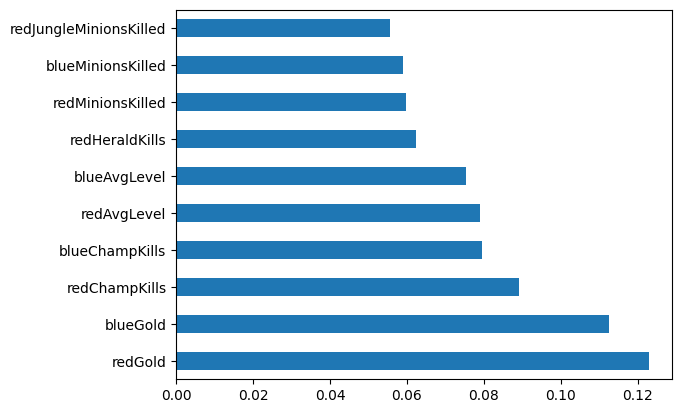

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

Pada Grafik tersebut, dapat dilihat fitur yang terpenting merupakan dari jumlah "Gold" yang dimiliki oleh setiap tim yang dapat menjadi pemicu tinggi rendahnya suatu tim dapat memenangkan pertandingan tersebut

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
corrmat = data.corr()
top_corr_features = corrmat.index

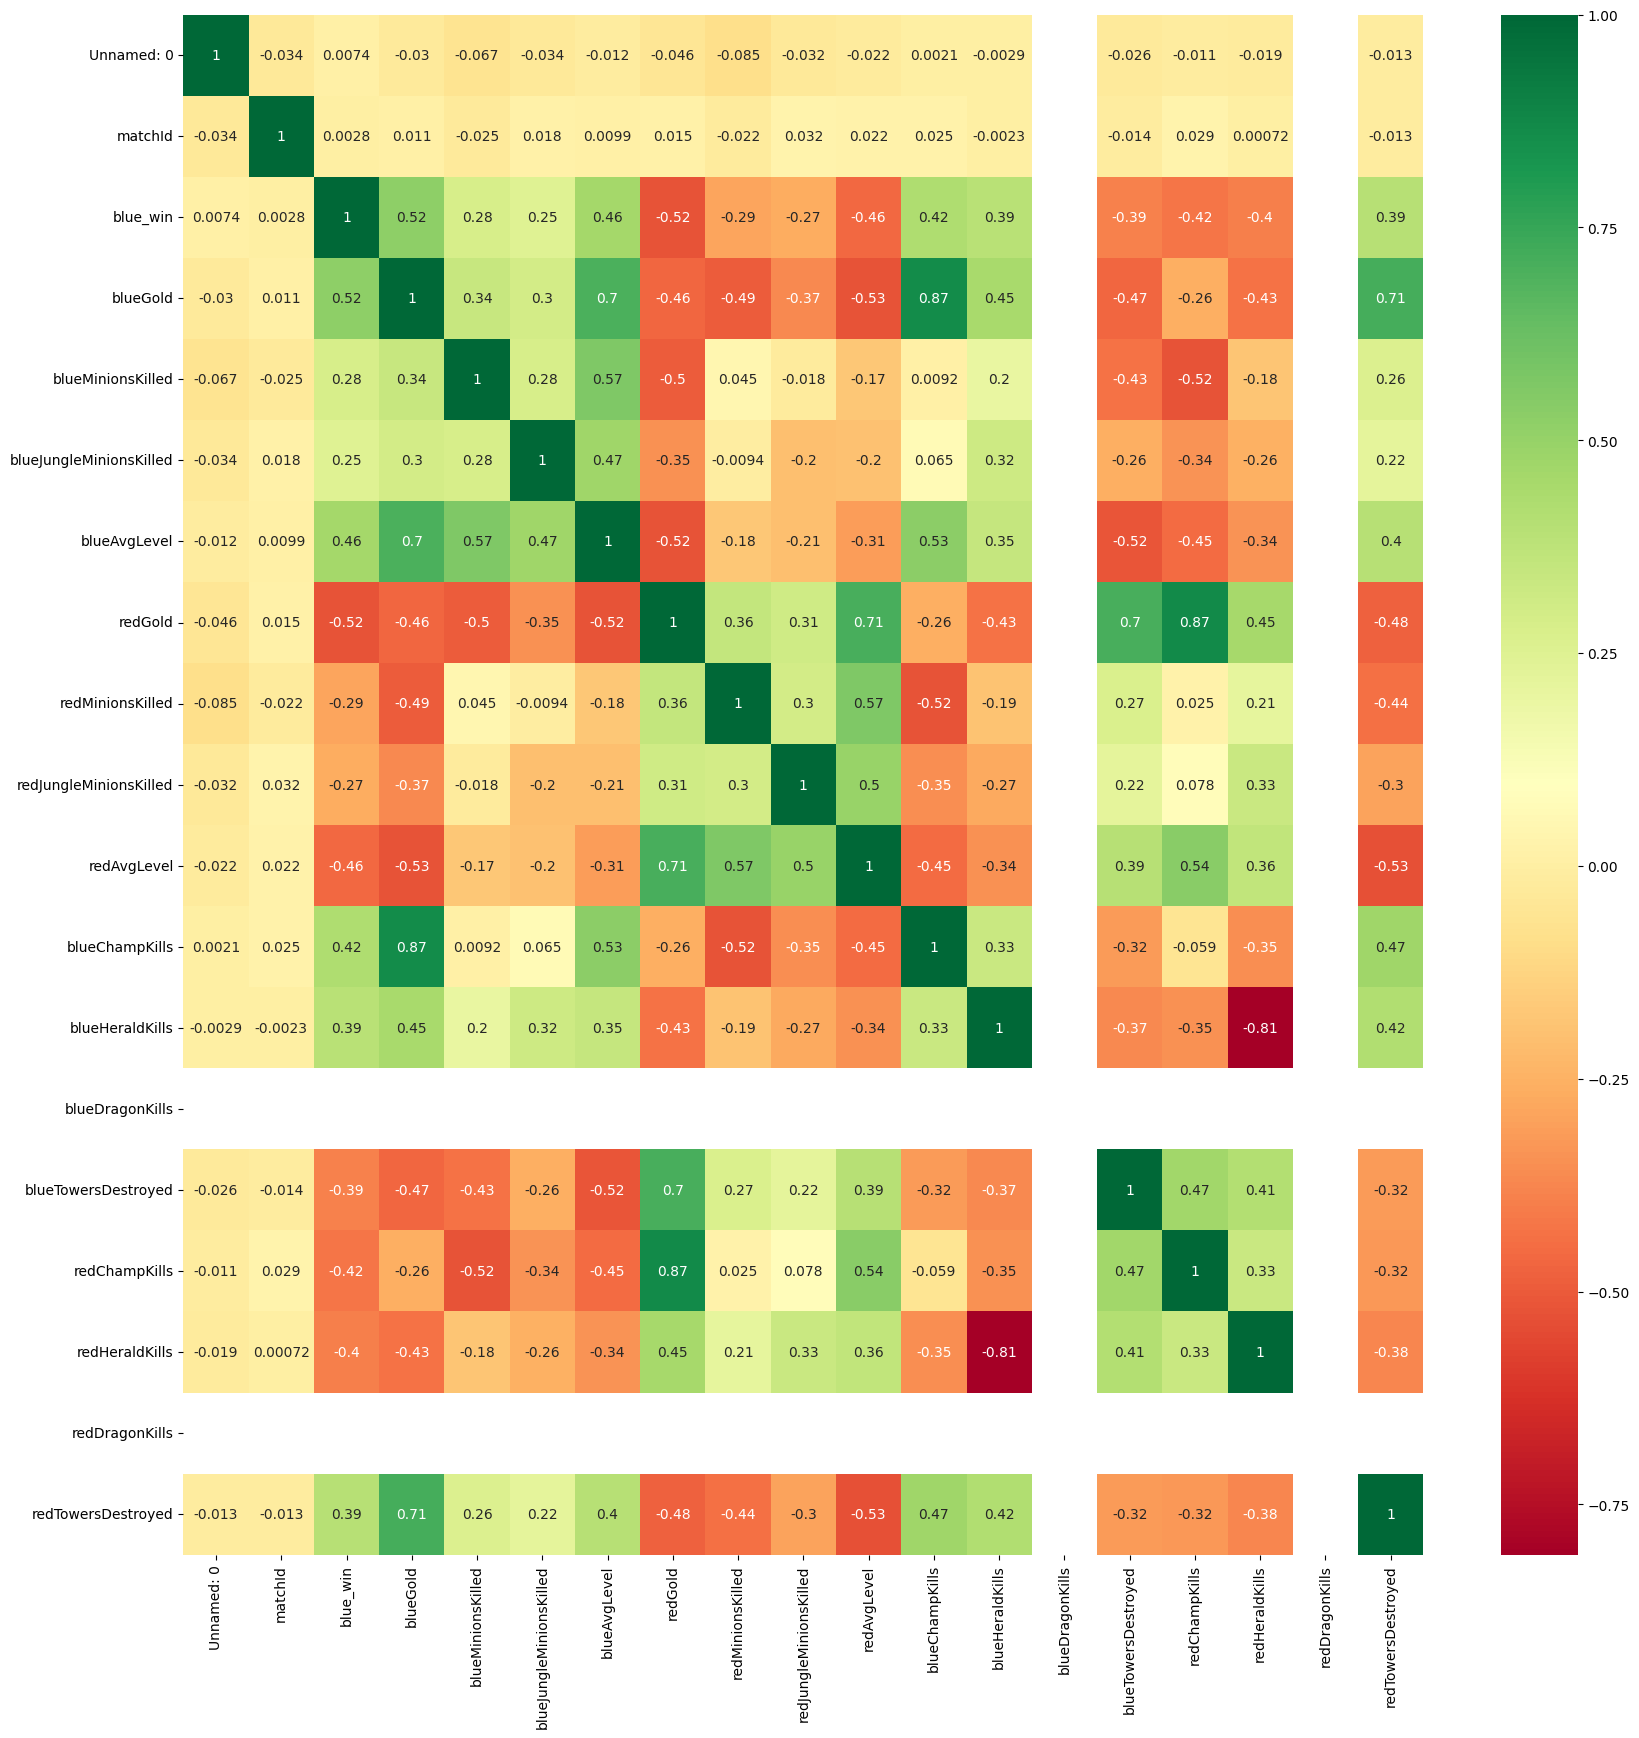

In [ ]:
plt.figure(figsize=(20,20))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")



*   Dari heatmap tersebut, jika dilihat pada baris ke-3 yaitu blue_win, korelasi antara blue_win dengan fitur lain dimana ada relasi kuat dengan variabel blue_gold dan diikuti oleh var blueAvgLevel, blueChampKills, blueHeraldKills dan redTowersDestroyed.
*   sedangkan utk var blueMinionsKilled dan blueJungleMinionsKilled berkorelasi lemah dengan blue_win
